In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Given operating speed at no load out of the Datasheet in sec/60°
no_load_speed_5V_sec60 = 0.2 # When operated with 5V
no_load_speed_6_8V_sec60 = 0.17 # When operated with 6.8V

# Transform into rad/s
no_load_speed_5V = (1/no_load_speed_5V_sec60) * (np.pi/3)
no_load_speed_6_8V = (1/no_load_speed_6_8V_sec60) * (np.pi/3)

# Given stall torque out of the Datasheet in kg*cm
stall_torque_5V_kgcm = 36 # When operated with 5V
stall_torque_6_8V_kgcm = 45 # When operated with 6.8V

# Transform into N*m
stall_torque_5V = 0.0981 * stall_torque_5V_kgcm
stall_torque_6_8V = 0.0981 * stall_torque_6_8V_kgcm


In [7]:
# Winding line when operated with 5V
def winding_line_5V(RPM):

    # Transform RPM in rad/s
    omega = RPM * (np.pi/30)

    T = stall_torque_5V * (1 - (omega/no_load_speed_5V))
    return T

# Winding line when operated with 6.8V
def winding_line_6_8V(RPM):

    # Transform RPM in rad/s
    omega = RPM * (np.pi/30)

    T = stall_torque_6_8V * (1 - (omega/no_load_speed_6_8V))
    return T

In [8]:
def operating_region(RPM):
    return 0.8 - RPM*0.01

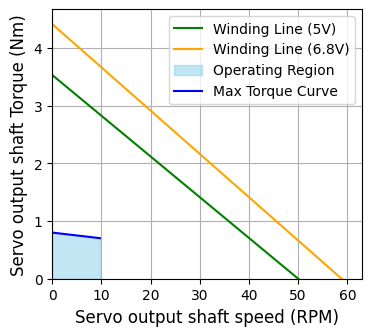

In [16]:
# Generate RPM values for the winding lines
rpm_values = np.linspace(0, 60, 100)
torque_values_5V = winding_line_5V(rpm_values)
torque_values_6_8V = winding_line_6_8V(rpm_values)

# Plot the winding lines
plt.figure(figsize=(4, 3.5))
plt.plot(rpm_values, torque_values_5V, color='green', label='Winding Line (5V)')
plt.plot(rpm_values, torque_values_6_8V, color='orange', label='Winding Line (6.8V)')

plt.fill_between(rpm_values[:17], operating_region(rpm_values[:17]), color='skyblue', alpha=0.5, label='Operating Region')
plt.plot(rpm_values[:17], operating_region(rpm_values[:17]), color='blue', label='Max Torque Curve')

# Customize the plot
plt.xlabel('Servo output shaft speed (RPM)', fontsize=12)
plt.ylabel('Servo output shaft Torque (Nm)', fontsize=12)
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.grid(True)
plt.legend()
plt.savefig("Servo_Performance_Analysis_plot.png", dpi=300, bbox_inches='tight') 
plt.show()